In [1]:
import cv2
import matplotlib.pyplot as plt

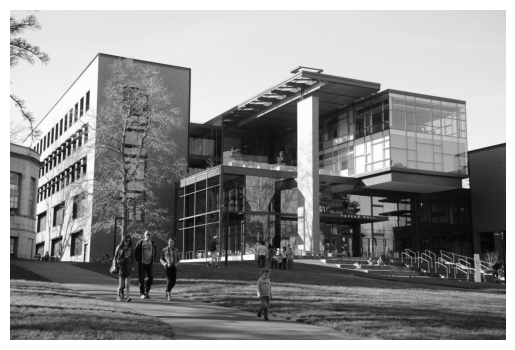

In [2]:
img = cv2.imread('Campus.jpg') # Adjust the path as necessary
if img is None:
	raise FileNotFoundError("Image file not found. Please check the path.")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

#### Analisis Histogram Citra Grayscale Asli

Histogram citra grayscale menunjukkan distribusi intensitas piksel pada gambar Campus.jpg, dengan rentang nilai 0 (hitam) hingga 255 (putih). Dari histogram tersebut dapat dianalisis bahwa gambar memiliki variasi tingkat keabuan yang cukup beragam, yang menandakan adanya kombinasi area gelap, sedang, dan terang. Jika puncak histogram lebih banyak berada di nilai tengah, maka citra cenderung memiliki pencahayaan normal dan detail objek masih terjaga. Sebaliknya, jika dominan di nilai rendah, citra cenderung gelap (underexposed), dan jika dominan di nilai tinggi, citra cenderung terlalu terang (overexposed).

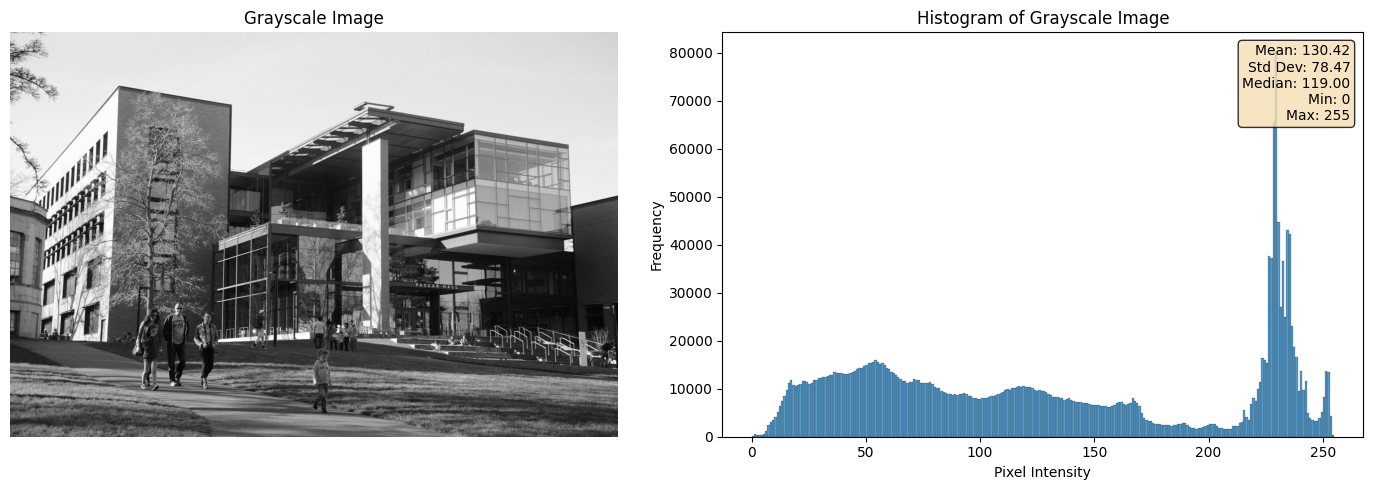

In [3]:
import seaborn as sns
import numpy as np

# Create figure with image and histogram
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Display image
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title('Grayscale Image')
axes[0].axis('off')

# Plot histogram
sns.histplot(img_gray.flatten(), bins=256, kde=False, ax=axes[1])
axes[1].set_xlabel('Pixel Intensity')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Grayscale Image')

# Add statistics text box
stats = {
	"mean": np.mean(img_gray.astype(np.float32)),
	"std": np.std(img_gray.astype(np.float32)),
	"min": np.min(img_gray),
	"max": np.max(img_gray),
	"median": np.median(img_gray.astype(np.float32)),
}
stats_text = f"Mean: {stats['mean']:.2f}\nStd Dev: {stats['std']:.2f}\nMedian: {stats['median']:.2f}\nMin: {stats['min']}\nMax: {stats['max']}"
axes[1].text(0.98, 0.97, stats_text, transform=axes[1].transAxes, 
			 fontsize=10, verticalalignment='top', horizontalalignment='right',
			 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

#### Analisis Histogram of Grayscale Image

Histogram citra grayscale menunjukkan distribusi intensitas piksel yang relatif merata pada rentang nilai tertentu, yang menandakan bahwa pencahayaan pada citra Campus.jpg cukup seimbang dan tidak didominasi oleh area yang terlalu gelap maupun terlalu terang. Nilai mean dan median yang berada di kisaran tengah memperkuat bahwa tingkat kecerahan citra berada pada level normal. Selain itu, nilai standar deviasi menunjukkan adanya variasi intensitas piksel yang cukup, sehingga citra memiliki kontras yang memadai dan detail objek masih dapat terlihat dengan jelas. Keberadaan nilai minimum dan maksimum yang mencakup rentang grayscale menandakan bahwa informasi visual pada area gelap dan terang tetap terjaga, sehingga citra ini layak digunakan untuk proses pengolahan citra lanjutan seperti filtering atau analisis fitur.

### Image Exposure

#### `convertScaleAbs` Function

Fungsi `cv2.convertScaleAbs()` digunakan untuk melakukan penskalaan intensitas piksel dan mengubah hasilnya menjadi nilai absolut. Fungsi ini menerima tiga parameter:
- **`src`**: Citra masukan  
- **`alpha`**: Faktor skala yang diterapkan pada setiap piksel  
- **`beta`**: Konstanta tambahan untuk setiap piksel (opsional)

Dalam simulasi *exposure*:
- **Underexposed** (`alpha=0.5`): Mengalikan setiap nilai piksel dengan 0.5 sehingga citra menjadi lebih gelap  
- **Overexposed** (`alpha=1.5`): Mengalikan setiap nilai piksel dengan 1.5 sehingga citra menjadi lebih terang  

#### `threshold` Function

Fungsi `cv2.threshold()` mengubah citra grayscale menjadi citra biner atau menerapkan berbagai operasi thresholding. Sintaksnya:
```python
cv2.threshold(src, thresh, maxval, type)
```

Untuk citra yang mengalami *overexposure*:
- **`cv2.THRESH_TRUNC`**: Piksel dengan nilai di atas *threshold* (255) akan dipotong menjadi nilai maksimum sehingga tidak terjadi *overflow* dan intensitas tetap berada pada 255.

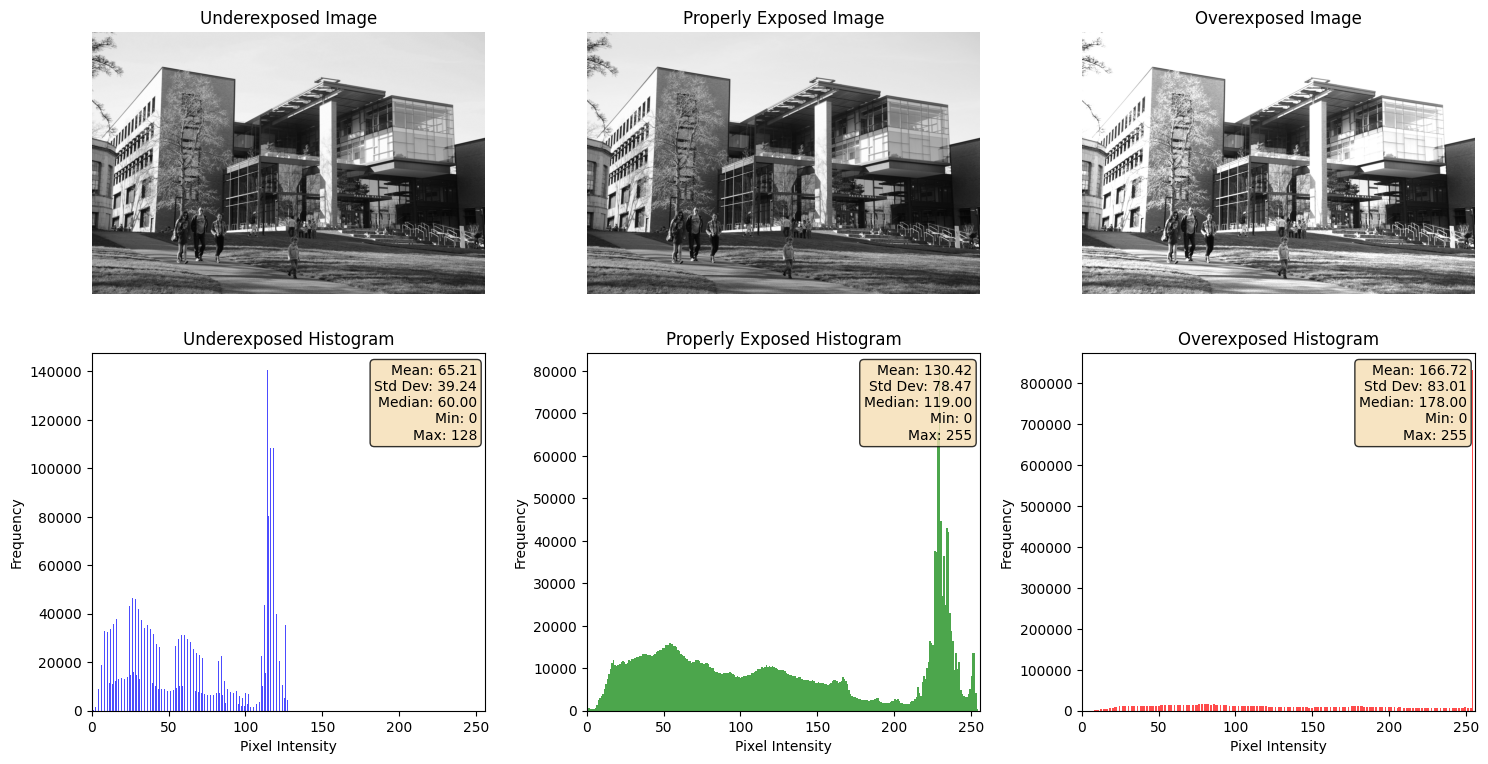

In [4]:
# Simulasikan citra dengan underexposed and overexposed
underexposed = cv2.convertScaleAbs(img_gray, alpha=0.5, beta=0)  # Darken the image
overexposed = cv2.convertScaleAbs(img_gray, alpha=1.5, beta=0)   # Brighten the image
overexposed = cv2.threshold(overexposed, 255, 255, cv2.THRESH_TRUNC)[1]  # Cap at 255

stats_under_exposed = {
	"mean": np.mean(underexposed.astype(np.float32)),
	"std": np.std(underexposed.astype(np.float32)),
	"min": np.min(underexposed),
	"max": np.max(underexposed),
	"median": np.median(underexposed.astype(np.float32)),
}

stats_properly_exposed = {
	"mean": np.mean(img_gray.astype(np.float32)),
	"std": np.std(img_gray.astype(np.float32)),
	"min": np.min(img_gray),
	"max": np.max(img_gray),
	"median": np.median(img_gray.astype(np.float32)),
}

stats_over_exposed = {
	"mean": np.mean(overexposed.astype(np.float32)),
	"std": np.std(overexposed.astype(np.float32)),
	"min": np.min(overexposed),
	"max": np.max(overexposed),
	"median": np.median(overexposed.astype(np.float32)),
}

# Create subplots: 3 for images, 3 for histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Underexposed
axes[0, 0].imshow(underexposed, cmap='gray')
axes[0, 0].set_title('Underexposed Image')
axes[0, 0].axis('off')

axes[1, 0].hist(underexposed.flatten(), bins=256, color='blue', alpha=0.7)
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Underexposed Histogram')
axes[1, 0].set_xlim([0, 256])
text_under = f"Mean: {stats_under_exposed['mean']:.2f}\nStd Dev: {stats_under_exposed['std']:.2f}\nMedian: {stats_under_exposed['median']:.2f}\nMin: {stats_under_exposed['min']}\nMax: {stats_under_exposed['max']}"
axes[1, 0].text(0.98, 0.97, text_under, transform=axes[1, 0].transAxes, 
			 fontsize=10, verticalalignment='top', horizontalalignment='right',
			 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Properly exposed
axes[0, 1].imshow(img_gray, cmap='gray')
axes[0, 1].set_title('Properly Exposed Image')
axes[0, 1].axis('off')

axes[1, 1].hist(img_gray.flatten(), bins=256, color='green', alpha=0.7)
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Properly Exposed Histogram')
axes[1, 1].set_xlim([0, 256])
text_proper = f"Mean: {stats_properly_exposed['mean']:.2f}\nStd Dev: {stats_properly_exposed['std']:.2f}\nMedian: {stats_properly_exposed['median']:.2f}\nMin: {stats_properly_exposed['min']}\nMax: {stats_properly_exposed['max']}"
axes[1, 1].text(0.98, 0.97, text_proper, transform=axes[1, 1].transAxes, 
			 fontsize=10, verticalalignment='top', horizontalalignment='right',
			 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Overexposed
axes[0, 2].imshow(overexposed, cmap='gray')
axes[0, 2].set_title('Overexposed Image')
axes[0, 2].axis('off')

axes[1, 2].hist(overexposed.flatten(), bins=256, color='red', alpha=0.7)
axes[1, 2].set_xlabel('Pixel Intensity')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Overexposed Histogram')
axes[1, 2].set_xlim([0, 256])
text_over = f"Mean: {stats_over_exposed['mean']:.2f}\nStd Dev: {stats_over_exposed['std']:.2f}\nMedian: {stats_over_exposed['median']:.2f}\nMin: {stats_over_exposed['min']}\nMax: {stats_over_exposed['max']}"
axes[1, 2].text(0.98, 0.97, text_over, transform=axes[1, 2].transAxes, 
			 fontsize=10, verticalalignment='top', horizontalalignment='right',
			 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

### Image Contrast

#### Fungsi `convertScaleAbs` untuk Penyesuaian Kontras

Fungsi `cv2.convertScaleAbs()` digunakan untuk menyesuaikan kontras dengan melakukan penskalaan intensitas piksel dan menambahkan offset. Fungsi ini memiliki tiga parameter:
- **`src`**: Citra masukan  
- **`alpha`**: Faktor skala untuk setiap piksel (mengatur kontras)  
- **`beta`**: Nilai offset untuk setiap piksel (menggeser kecerahan)

Dalam simulasi kontras:
- **Low contrast** (`alpha=0.5, beta=128`): Mengurangi perbedaan intensitas piksel, membuat citra tampak lebih datar. Nilai beta menjaga rentang tetap di sekitar 128 untuk menghindari *clipping*.  
- **Normal contrast** (`alpha=1.0, beta=0`): Menggunakan citra asli tanpa perubahan, mempertahankan perbedaan intensitas alami.  
- **High contrast** (`alpha=1.5, beta=0`): Memperbesar perbedaan intensitas sehingga detail dan tepi lebih menonjol, namun dapat menyebabkan saturasi. Threshold diterapkan menggunakan `cv2.THRESH_TRUNC` untuk membatasi nilai hingga 255.

#### Analisis Histogram

Histogram menampilkan distribusi intensitas piksel:
- **Low contrast**: Intensitas berkumpul di sekitar nilai tengah (misalnya 128), membentuk histogram sempit dengan rentang dinamis kecil.  
- **Normal contrast**: Terdistribusi lebih merata dari 0–255, menunjukkan rentang intensitas yang seimbang.  
- **High contrast**: Terentang hingga ke nilai ekstrem, dengan puncak mendekati 0 dan 255, menandakan pemisahan intensitas yang kuat namun berisiko kehilangan detail pada area terang/gelap.

Simulasi ini memperlihatkan bagaimana kontras mempengaruhi kualitas dan interpretasi citra.


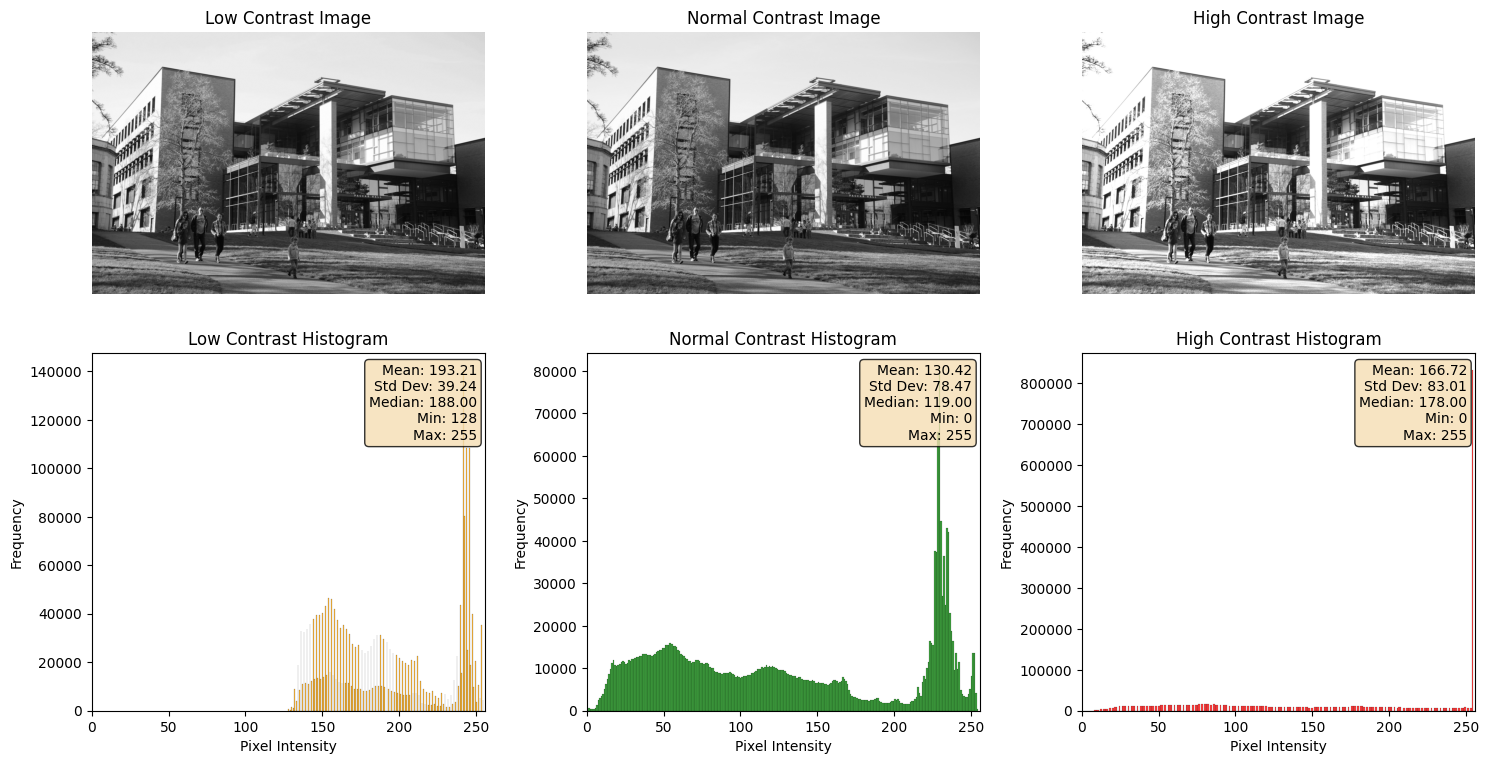

In [5]:
# Simulasi gambar dengan kontras berbeda menggunakan operasi matematika pada pixel
# Low contrast: mengurangi perbedaan intensitas pixel
low_contrast = cv2.convertScaleAbs(img_gray, alpha=0.5, beta=128)
stats_low_contrast = {
	"mean": np.mean(low_contrast.astype(np.float32)),
	"std": np.std(low_contrast.astype(np.float32)),
	"min": np.min(low_contrast),
	"max": np.max(low_contrast),
	"median": np.median(low_contrast.astype(np.float32)),
}

# Normal contrast: gambar asli
normal_contrast = img_gray
stats_normal_contrast = {
	"mean": np.mean(normal_contrast.astype(np.float32)),
	"std": np.std(normal_contrast.astype(np.float32)),
	"min": np.min(normal_contrast),
	"max": np.max(normal_contrast),
	"median": np.median(normal_contrast.astype(np.float32)),
}

# High contrast: meningkatkan perbedaan intensitas pixel dengan stretching
high_contrast = cv2.convertScaleAbs(img_gray, alpha=1.5, beta=0)
high_contrast = cv2.threshold(high_contrast, 255, 255, cv2.THRESH_TRUNC)[1]
stats_high_contrast = {
	"mean": np.mean(high_contrast.astype(np.float32)),
	"std": np.std(high_contrast.astype(np.float32)),
	"min": np.min(high_contrast),
	"max": np.max(high_contrast),
	"median": np.median(high_contrast.astype(np.float32)),
}
# Buat subplot: 3 untuk gambar, 3 untuk histogram
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Kontras rendah
axes[0, 0].imshow(low_contrast, cmap='gray')
axes[0, 0].set_title('Low Contrast Image')
axes[0, 0].axis('off')

sns.histplot(low_contrast.flatten(), bins=256, color='orange', kde=False, ax=axes[1, 0])
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Low Contrast Histogram')
axes[1, 0].set_xlim([0, 256])
text_low = f"Mean: {stats_low_contrast['mean']:.2f}\nStd Dev: {stats_low_contrast['std']:.2f}\nMedian: {stats_low_contrast['median']:.2f}\nMin: {stats_low_contrast['min']}\nMax: {stats_low_contrast['max']}"
axes[1, 0].text(0.98, 0.97, text_low, transform=axes[1, 0].transAxes, 
			 fontsize=10, verticalalignment='top', horizontalalignment='right',
			 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Kontras normal
axes[0, 1].imshow(normal_contrast, cmap='gray')
axes[0, 1].set_title('Normal Contrast Image')
axes[0, 1].axis('off')

sns.histplot(normal_contrast.flatten(), bins=256, color='green', kde=False, ax=axes[1, 1])
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Normal Contrast Histogram')
axes[1, 1].set_xlim([0, 256])
text_normal = f"Mean: {stats_normal_contrast['mean']:.2f}\nStd Dev: {stats_normal_contrast['std']:.2f}\nMedian: {stats_normal_contrast['median']:.2f}\nMin: {stats_normal_contrast['min']}\nMax: {stats_normal_contrast['max']}"
axes[1, 1].text(0.98, 0.97, text_normal, transform=axes[1, 1].transAxes, 
			 fontsize=10, verticalalignment='top', horizontalalignment='right',
			 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Kontras tinggi
axes[0, 2].imshow(high_contrast, cmap='gray')
axes[0, 2].set_title('High Contrast Image')
axes[0, 2].axis('off')

sns.histplot(high_contrast.flatten(), bins=256, color='red', kde=False, ax=axes[1, 2])
axes[1, 2].set_xlabel('Pixel Intensity')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('High Contrast Histogram')
axes[1, 2].set_xlim([0, 256])
text_high = f"Mean: {stats_high_contrast['mean']:.2f}\nStd Dev: {stats_high_contrast['std']:.2f}\nMedian: {stats_high_contrast['median']:.2f}\nMin: {stats_high_contrast['min']}\nMax: {stats_high_contrast['max']}"
axes[1, 2].text(0.98, 0.97, text_high, transform=axes[1, 2].transAxes, 
			 fontsize=10, verticalalignment='top', horizontalalignment='right',
			 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

### Image Dynamic Range

#### Fungsi `convertScaleAbs` untuk Penyesuaian Dynamic Range

Fungsi `cv2.convertScaleAbs()` digunakan untuk menyesuaikan rentang dinamis citra dengan menskalakan intensitas piksel dan menambahkan offset. Parameter utamanya:
- **`src`**: Citra masukan  
- **`alpha`**: Faktor skala yang mengatur rentang intensitas  
- **`beta`**: Offset untuk menggeser nilai piksel

Dalam simulasi dynamic range:
- **High dynamic range** (`alpha=1.0, beta=0`): Menggunakan rentang penuh 0–255, mempertahankan variasi intensitas maksimal.  
- **Low dynamic range** (`alpha=0.25, beta=96`): Mengurangi rentang menjadi sekitar 64 nilai, membuat citra tampak lebih datar dengan variasi terbatas.  
- **Extremely low dynamic range**: Menggunakan kuantisasi untuk membatasi intensitas hanya pada 6 level (dengan pembagian 256/6 ≈ 43), menghasilkan citra dengan detail yang sangat kasar.

#### Operasi Kuantisasi untuk Extremely Low Dynamic Range

Untuk mencapai dynamic range yang sangat rendah, citra dikuantisasi dengan membagi nilai piksel menjadi beberapa level:
- Rumus: `(img_gray // step) * step`, di mana `step = 256 / num_levels` (misalnya 43 untuk 6 level). Ini mengelompokkan piksel ke nilai diskrit, mengurangi nuansa warna dan detail.

#### Analisis Histogram

Histogram menunjukkan distribusi intensitas piksel:
- **High dynamic range**: Distribusi merata dari 0–255, menunjukkan variasi intensitas yang luas dan detail yang kaya.  
- **Low dynamic range**: Intensitas berkumpul di sekitar nilai tengah (sekitar 96–160), dengan histogram yang lebih sempit dan rentang dinamis terbatas.  
- **Extremely low dynamic range**: Histogram terdiri dari puncak-puncak diskrit pada 6 level, menandakan hilangnya gradasi halus dan potensi kehilangan informasi visual.

Simulasi ini menunjukkan bagaimana dynamic range mempengaruhi kualitas citra, dari detail tinggi hingga representasi yang sangat sederhana.

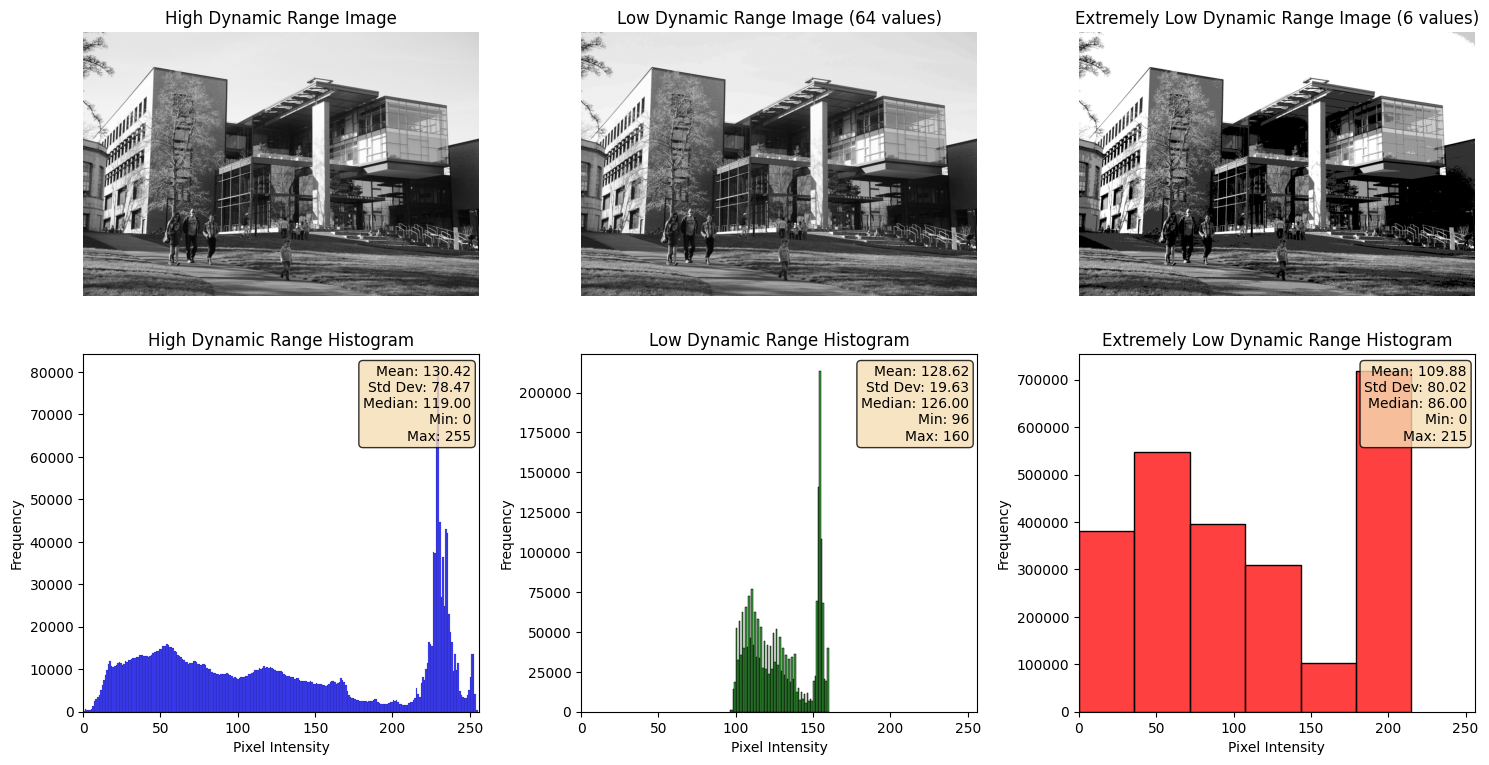

In [6]:
# Simulasi gambar dengan dynamic range berbeda
# High dynamic range: menggunakan full range 0-255
high_dynamic_range = img_gray
stats_high_dynamic = {
	"mean": np.mean(high_dynamic_range.astype(np.float32)),
	"std": np.std(high_dynamic_range.astype(np.float32)),
	"min": np.min(high_dynamic_range),
	"max": np.max(high_dynamic_range),
	"median": np.median(high_dynamic_range.astype(np.float32)),
}

# Low dynamic range dengan nilai intensitas 64
low_dynamic_range = cv2.convertScaleAbs(img_gray, alpha=0.25, beta=96)  # Scale to 64 values centered around 96
stats_low_dynamic = {
	"mean": np.mean(low_dynamic_range.astype(np.float32)),
	"std": np.std(low_dynamic_range.astype(np.float32)),
	"min": np.min(low_dynamic_range),
	"max": np.max(low_dynamic_range),
	"median": np.median(low_dynamic_range.astype(np.float32)),
}

# Extremely low dynamic range dengan hanya 6 nilai intensitas
# Quantize ke 6 level
extremely_low_dynamic = (img_gray // 43) * 43  # 256/6 ≈ 43
stats_extremely_low_dynamic = {
	"mean": np.mean(extremely_low_dynamic.astype(np.float32)),
	"std": np.std(extremely_low_dynamic.astype(np.float32)),
	"min": np.min(extremely_low_dynamic),
	"max": np.max(extremely_low_dynamic),
	"median": np.median(extremely_low_dynamic.astype(np.float32)),
}

# Buat subplot: 3 untuk gambar, 3 untuk histogram
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# High dynamic range
axes[0, 0].imshow(high_dynamic_range, cmap='gray')
axes[0, 0].set_title('High Dynamic Range Image')
axes[0, 0].axis('off')

sns.histplot(high_dynamic_range.flatten(), bins=256, color='blue', kde=False, ax=axes[1, 0])
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('High Dynamic Range Histogram')
axes[1, 0].set_xlim([0, 256])
text_high_dynamic = f"Mean: {stats_high_dynamic['mean']:.2f}\nStd Dev: {stats_high_dynamic['std']:.2f}\nMedian: {stats_high_dynamic['median']:.2f}\nMin: {stats_high_dynamic['min']}\nMax: {stats_high_dynamic['max']}"
axes[1, 0].text(0.98, 0.97, text_high_dynamic, transform=axes[1, 0].transAxes, 
			 fontsize=10, verticalalignment='top', horizontalalignment='right',
			 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Low dynamic range
axes[0, 1].imshow(low_dynamic_range, cmap='gray')
axes[0, 1].set_title('Low Dynamic Range Image (64 values)')
axes[0, 1].axis('off')

sns.histplot(low_dynamic_range.flatten(), bins=64, color='green', kde=False, ax=axes[1, 1])
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Low Dynamic Range Histogram')
axes[1, 1].set_xlim([0, 256])
text_low_dynamic = f"Mean: {stats_low_dynamic['mean']:.2f}\nStd Dev: {stats_low_dynamic['std']:.2f}\nMedian: {stats_low_dynamic['median']:.2f}\nMin: {stats_low_dynamic['min']}\nMax: {stats_low_dynamic['max']}"
axes[1, 1].text(0.98, 0.97, text_low_dynamic, transform=axes[1, 1].transAxes, 
			 fontsize=10, verticalalignment='top', horizontalalignment='right',
			 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Extremely low dynamic range
axes[0, 2].imshow(extremely_low_dynamic, cmap='gray')
axes[0, 2].set_title('Extremely Low Dynamic Range Image (6 values)')
axes[0, 2].axis('off')

sns.histplot(extremely_low_dynamic.flatten(), bins=6, color='red', kde=False, ax=axes[1, 2])
axes[1, 2].set_xlabel('Pixel Intensity')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Extremely Low Dynamic Range Histogram')
axes[1, 2].set_xlim([0, 256])
text_extremely_low_dynamic = f"Mean: {stats_extremely_low_dynamic['mean']:.2f}\nStd Dev: {stats_extremely_low_dynamic['std']:.2f}\nMedian: {stats_extremely_low_dynamic['median']:.2f}\nMin: {stats_extremely_low_dynamic['min']}\nMax: {stats_extremely_low_dynamic['max']}"
axes[1, 2].text(0.98, 0.97, text_extremely_low_dynamic, transform=axes[1, 2].transAxes, 
			 fontsize=10, verticalalignment='top', horizontalalignment='right',
			 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

### Latihan

Analisis histogram berikut dan jawab pertanyaan di bawah ini:
1. Apakah citra digital pada histogram di bawah ini memiliki eksposur yang baik? Jelaskan jawaban Anda.
2. Apakah citra digital pada histogram di bawah ini memiliki kontras yang rendah? Jelaskan jawaban Anda.

mean: 130.42
std: 78.47
min: 0.00
max: 255.00
median: 119.00


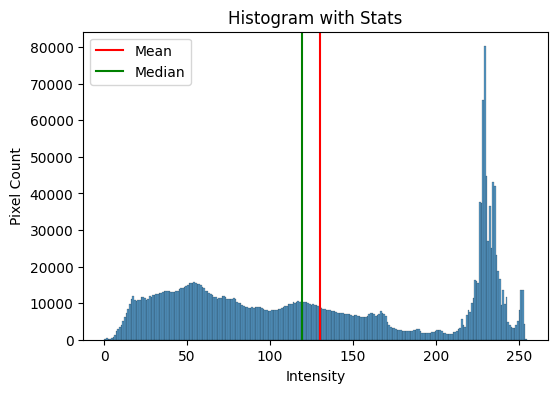

In [7]:
import numpy as np

# Compute stats
stats = {
    "mean": np.mean(img_gray.astype(np.float32)),
    "std": np.std(img_gray.astype(np.float32)),
    "min": np.min(img_gray),
    "max": np.max(img_gray),
    "median": np.median(img_gray.astype(np.float32)),
}

for k, v in stats.items():
    print(f"{k}: {v:.2f}")

# Plot histogram
plt.figure(figsize=(6,4))
sns.histplot(img_gray.flatten(), bins=256, kde=False)
plt.title("Histogram with Stats")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")
plt.axvline(stats["mean"], color='r', label='Mean')
plt.axvline(stats["median"], color='g', label='Median')
plt.legend()
plt.show()

### Histogram pada Citra Digital lebih dari 8 bit

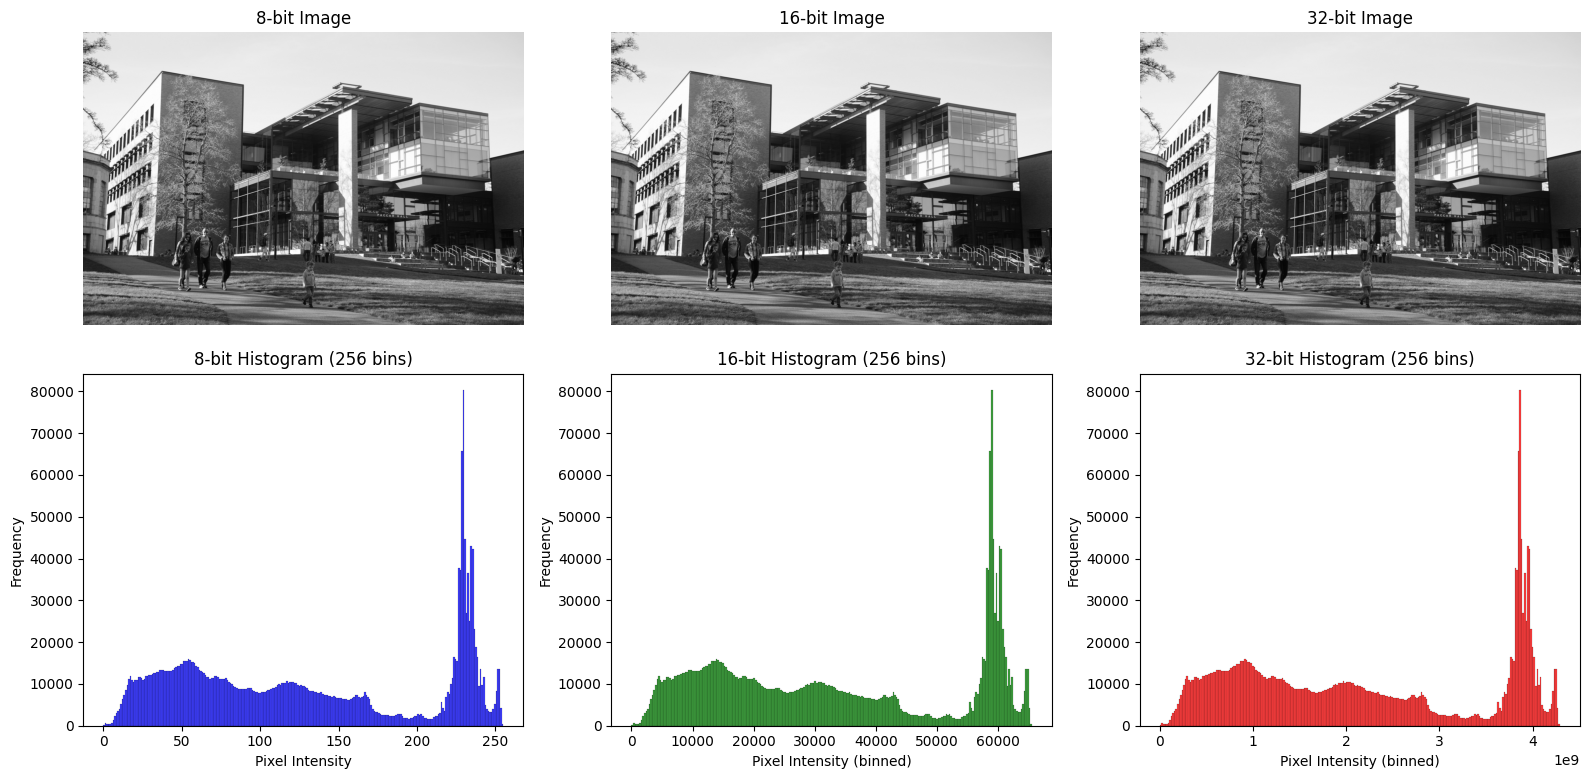

Statistik Citra 8-bit:
  Min: 0, Max: 255, Mean: 130.42

Statistik Citra 16-bit:
  Min: 0, Max: 65535, Mean: 33518.46

Statistik Citra 32-bit:
  Min: 0, Max: 4294967295, Mean: 2196699113.92


In [8]:
# Buat citra 16-bit dan 32-bit dari citra grayscale asli
# Skala citra 8-bit (0-255) ke 16-bit (0-65535) dan 32-bit (0-4294967295)
img_16bit = (img_gray.astype(np.uint16) * 257)  # Scale 0-255 to 0-65535
img_32bit = (img_gray.astype(np.uint32) * 16843009)  # Scale 0-255 to 0-4294967295


# Buat histogram dengan binning untuk citra dengan kedalaman bit tinggi
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

# Histogram 8-bit (asli)
axes[0, 0].imshow(img_gray, cmap='gray')
axes[0, 0].set_title('8-bit Image')
axes[0, 0].axis('off')

sns.histplot(img_gray.flatten(), bins=256, color='blue', kde=False, ax=axes[1, 0])
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('8-bit Histogram (256 bins)')

# Histogram 16-bit dengan binning (256 bins)
axes[0, 1].imshow(img_16bit, cmap='gray')
axes[0, 1].set_title('16-bit Image')
axes[0, 1].axis('off')

sns.histplot(img_16bit.flatten(), bins=256, color='green', kde=False, ax=axes[1, 1])
axes[1, 1].set_xlabel('Pixel Intensity (binned)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('16-bit Histogram (256 bins)')

# Histogram 32-bit dengan binning (256 bins)
axes[0, 2].imshow(img_32bit, cmap='gray')
axes[0, 2].set_title('32-bit Image')
axes[0, 2].axis('off')

sns.histplot(img_32bit.flatten(), bins=256, color='red', kde=False, ax=axes[1, 2])
axes[1, 2].set_xlabel('Pixel Intensity (binned)')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('32-bit Histogram (256 bins)')

plt.tight_layout()
plt.show()

# Print statistik untuk setiap kedalaman bit
print("Statistik Citra 8-bit:")
print(f"  Min: {img_gray.min()}, Max: {img_gray.max()}, Mean: {img_gray.mean():.2f}")
print("\nStatistik Citra 16-bit:")
print(f"  Min: {img_16bit.min()}, Max: {img_16bit.max()}, Mean: {img_16bit.mean():.2f}")
print("\nStatistik Citra 32-bit:")
print(f"  Min: {img_32bit.min()}, Max: {img_32bit.max()}, Mean: {img_32bit.mean():.2f}")

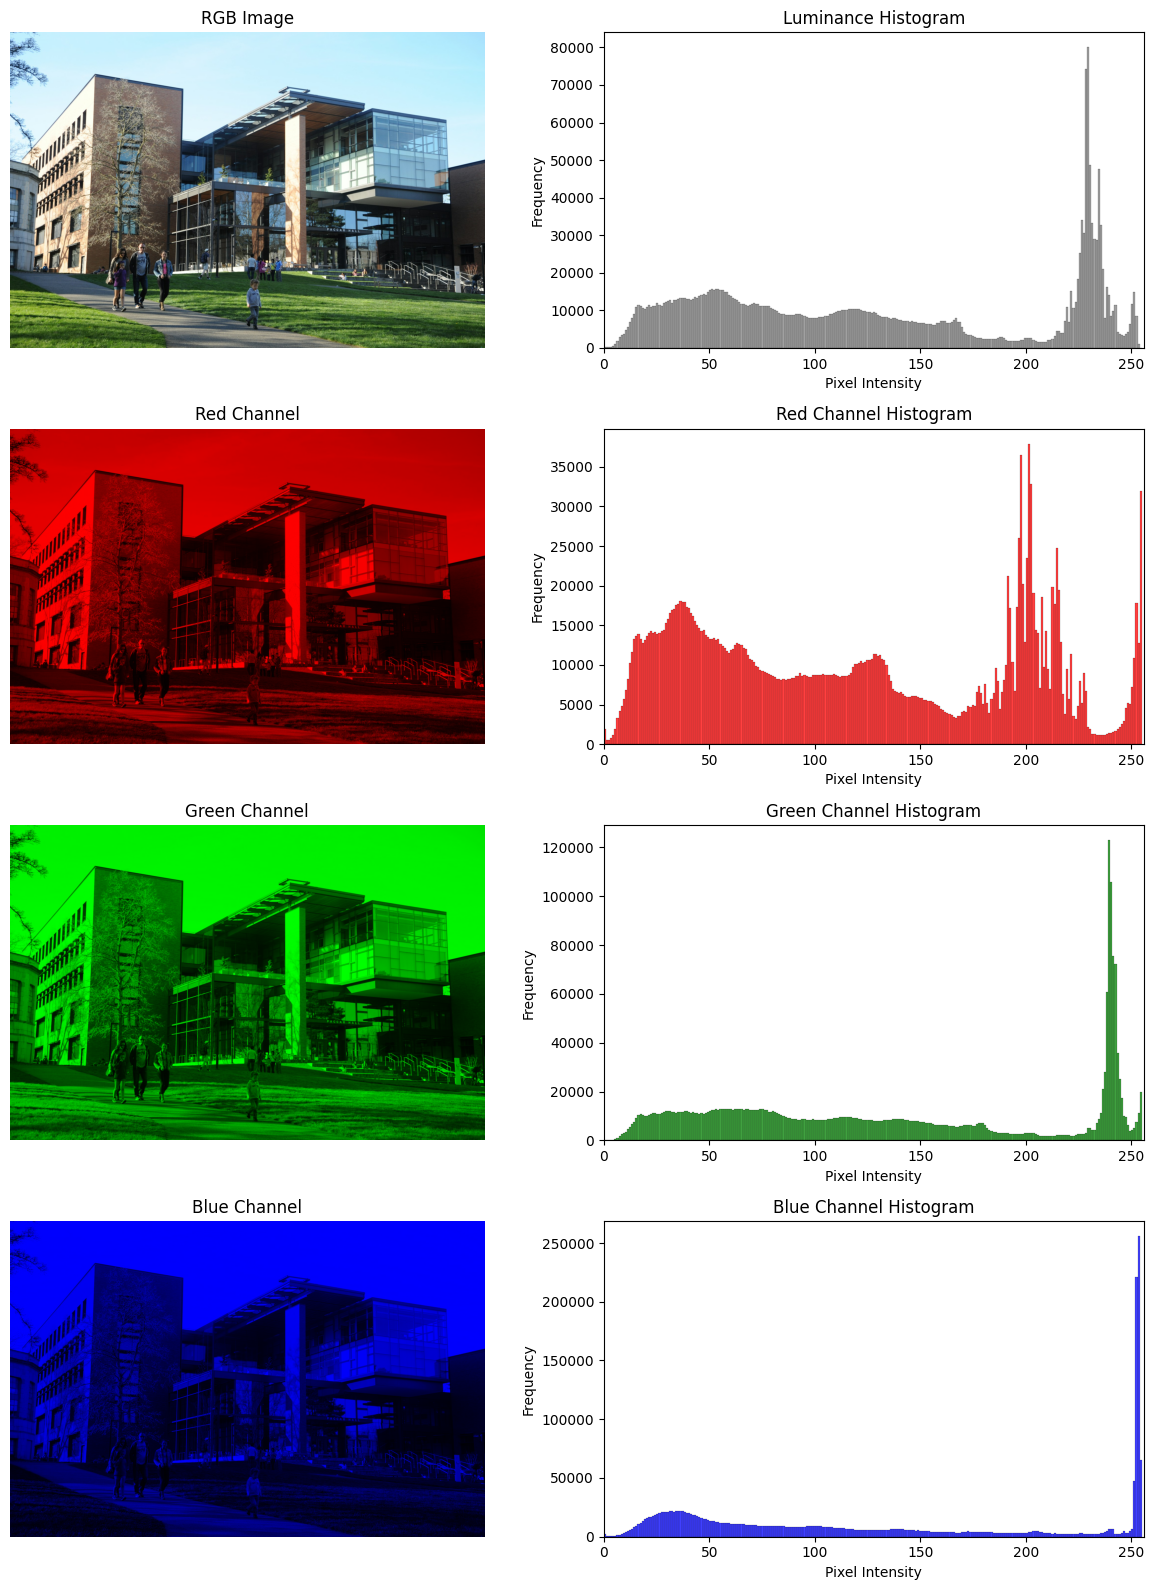

In [9]:
# Load citra berwarna
img_rgb = cv2.imread('Campus.jpg')
if img_rgb is None:
    raise FileNotFoundError("Image file not found. Please check the path.")

# Convert BGR to RGB (OpenCV menggunakan BGR)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

# Hitung luminance menggunakan formula standar: Y = 0.299*R + 0.587*G + 0.114*B
luminance = (0.299 * img_rgb[:,:,0] + 0.587 * img_rgb[:,:,1] + 0.114 * img_rgb[:,:,2]).astype(np.uint8)

# Pisahkan channel RGB
red_channel = img_rgb[:,:,0]
green_channel = img_rgb[:,:,1]
blue_channel = img_rgb[:,:,2]

# Buat subplot: 4 baris x 2 kolom
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# 1. Citra berwarna dan histogram luminance
axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title('RGB Image')
axes[0, 0].axis('off')

sns.histplot(luminance.flatten(), bins=256, color='gray', kde=False, ax=axes[0, 1])
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Luminance Histogram')
axes[0, 1].set_xlim([0, 256])

# 2. Red channel
red_img = np.zeros_like(img_rgb)
red_img[:,:,0] = red_channel
axes[1, 0].imshow(red_img)
axes[1, 0].set_title('Red Channel')
axes[1, 0].axis('off')

sns.histplot(red_channel.flatten(), bins=256, color='red', kde=False, ax=axes[1, 1])
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Red Channel Histogram')
axes[1, 1].set_xlim([0, 256])

# 3. Green channel
green_img = np.zeros_like(img_rgb)
green_img[:,:,1] = green_channel
axes[2, 0].imshow(green_img)
axes[2, 0].set_title('Green Channel')
axes[2, 0].axis('off')

sns.histplot(green_channel.flatten(), bins=256, color='green', kde=False, ax=axes[2, 1])
axes[2, 1].set_xlabel('Pixel Intensity')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].set_title('Green Channel Histogram')
axes[2, 1].set_xlim([0, 256])

# 4. Blue channel
blue_img = np.zeros_like(img_rgb)
blue_img[:,:,2] = blue_channel
axes[3, 0].imshow(blue_img)
axes[3, 0].set_title('Blue Channel')
axes[3, 0].axis('off')

sns.histplot(blue_channel.flatten(), bins=256, color='blue', kde=False, ax=axes[3, 1])
axes[3, 1].set_xlabel('Pixel Intensity')
axes[3, 1].set_ylabel('Frequency')
axes[3, 1].set_title('Blue Channel Histogram')
axes[3, 1].set_xlim([0, 256])

plt.tight_layout()
plt.show()